In [ ]:
!pip install fiftyone

     |████████████████████████████████| 1.2 MB 8.0 MB/s 
     |████████████████████████████████| 106 kB 43.4 MB/s 
     |████████████████████████████████| 13.2 MB 48.8 MB/s 
     |████████████████████████████████| 47.6 MB 1.9 MB/s 
     |████████████████████████████████| 562 kB 47.0 MB/s 
     |████████████████████████████████| 55 kB 2.9 MB/s 
     |████████████████████████████████| 131 kB 47.4 MB/s 
     |████████████████████████████████| 639 kB 50.3 MB/s 
     |████████████████████████████████| 29.2 MB 59.3 MB/s 
     |████████████████████████████████| 226 kB 54.3 MB/s 
     |████████████████████████████████| 79.9 MB 79 kB/s 
     |████████████████████████████████| 83 kB 1.5 MB/s 
     |████████████████████████████████| 56 kB 3.1 MB/s 
     |████████████████████████████████| 78 kB 6.6 MB/s 
     |████████████████████████████████| 54 kB 3.1 MB/s 
     |████████████████████████████████| 77 kB 5.5 MB/s 
     |████████████████████████████████| 79 kB 7.2 MB/s 
     |██████████████████████

In [ ]:
import fiftyone as fo
import fiftyone.zoo as foz

dataset = foz.load_zoo_dataset(
    "coco-2017",
    split="validation",
    dataset_name="evaluate-detections-tutorial",
)
dataset.persistent = True

 100% |██████|    1.9Gb/1.9Gb [6.0s elapsed, 0s remaining, 354.8Mb/s]       
Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_val2017.json'
 100% |██████|    6.1Gb/6.1Gb [20.1s elapsed, 0s remaining, 352.5Mb/s]      
Extracting images to '/root/fiftyone/coco-2017/validation/data'
Writing annotations to '/root/fiftyone/coco-2017/validation/labels.json'
Dataset info written to '/root/fiftyone/coco-2017/info.json'
Loading 'coco-2017' split 'validation'
 100% |███████████████| 5000/5000 [38.7s elapsed, 0s remaining, 137.8 samples/s]      
Dataset 'evaluate-detections-tutorial' created


In [ ]:
print(dataset)

Name:        evaluate-detections-tutorial
Media type:  image
Num samples: 5000
Persistent:  True
Tags:        ['validation']
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.Metadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)


In [ ]:
for sample in dataset:
  temp = []
  for i in range(len(sample.ground_truth.detections)):
    temp.append(sample.ground_truth.detections[i].label)
  print(sample.id , ":", temp)

61b7c8933829e4b68d05c21f : ['potted plant', 'tv', 'tv', 'chair', 'chair', 'chair', 'chair', 'person', 'person', 'microwave', 'refrigerator', 'book', 'book', 'clock', 'vase', 'vase', 'chair', 'vase', 'vase', 'dining table']
61b7c8933829e4b68d05c247 : ['bear']
61b7c8933829e4b68d05c248 : ['bed', 'potted plant', 'book', 'book', 'book', 'book', 'book', 'chair', 'potted plant', 'book', 'book', 'book', 'book', 'book', 'book', 'book', 'book', 'book']
61b7c8933829e4b68d05c268 : ['stop sign', 'truck', 'car', 'stop sign']
61b7c8933829e4b68d05c269 : ['teddy bear', 'teddy bear', 'teddy bear', 'bed']
61b7c8933829e4b68d05c26a : ['person', 'skis']
61b7c8933829e4b68d05c26b : ['refrigerator', 'oven']
61b7c8943829e4b68d05c2b0 : ['sports ball', 'person', 'person', 'baseball glove']
61b7c8943829e4b68d05c2b1 : ['person', 'person', 'person', 'person', 'person', 'tennis racket', 'person', 'person', 'person']
61b7c8943829e4b68d05c2b2 : ['tennis racket', 'handbag', 'handbag', 'person', 'person', 'person', 'pers

In [ ]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

annFile=f'/content/drive/MyDrive/instances_val2017.json'

coco=COCO(annFile)


loading annotations into memory...
Done (t=1.99s)
creating index...
index created!


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import torch
import tensorflow as tf
from torchvision.models.segmentation import fcn_resnet50

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = fcn_resnet50(pretrained=True, progress=False)
model = model.eval()

Downloading: "https://download.pytorch.org/models/fcn_resnet50_coco-1167a1af.pth" to /root/.cache/torch/hub/checkpoints/fcn_resnet50_coco-1167a1af.pth


In [ ]:
LABEL_NAMES = np.asarray([
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle',
    'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog',
    'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa',
    'train', 'tv'
])

FULL_LABEL_MAP = np.arange(len(LABEL_NAMES)).reshape(len(LABEL_NAMES), 1)

['background' 'bottle' 'diningtable' 'person']


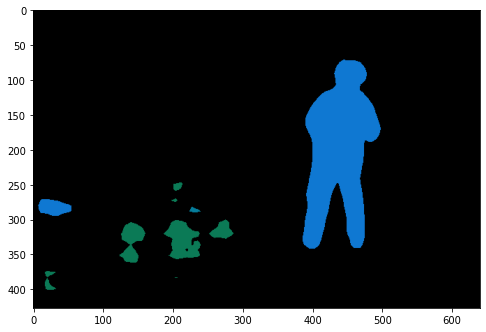

In [ ]:
# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

#create a color pallette, selecting a color for each class
palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")

# get all images containing given categories, select one at random
# catIds = coco.getCatIds(catNms=['person','dog','skateboard','elephant','cat']);
# imgIds = coco.getImgIds(catIds=catIds );
imgIds = coco.getImgIds(imgIds = [])
numimages = len(imgIds)
for i in range(1):
  #print(imgIds[i])
  img = coco.loadImgs(imgIds[i])[0]
  input_image = io.imread(img['coco_url'])
  #plt.imshow(input_image)
  input_tensor = preprocess(input_image)
  input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

  # move the input and model to GPU for speed if available
  if torch.cuda.is_available():
      input_batch = input_batch.to('cuda')
      model.to('cuda')

  with torch.no_grad():
      output = model(input_batch)['out'][0]
  output_predictions = output.argmax(0)

  unique_labels = np.unique(output_predictions)
  print(LABEL_NAMES[unique_labels])
  r = Image.fromarray(output_predictions.byte().cpu().numpy())
  r.putpalette(colors)
  plt.imshow(r)

  i += 1
